# Neural Collaborative Filtering

## Embeddings

In [1]:
from keras.utils import to_categorical

# We have 10 users, each is uniquely identified by an ID.
users = [i for i in range(10)]
to_categorical(users)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [2]:
import numpy as np

latent_dim = 5
inputs = to_categorical(users)
embed_mat = np.random.randn(len(users), latent_dim)

inputs.dot(embed_mat)

array([[-1.52292192, -0.53030729,  0.29064512,  1.48477769, -0.02031419],
       [ 0.76118133, -1.21959741, -0.37928995,  1.25090921, -0.29352551],
       [-0.02378185, -0.23927471,  0.38609565,  1.43855419, -0.13537575],
       [-1.26191835, -0.1241199 ,  0.37062949, -0.31307267,  0.05331093],
       [-0.4659539 , -1.46400578, -0.43722786, -0.34585945, -0.80404059],
       [ 1.06417285, -1.87118564,  1.18562518, -0.21883608, -1.70979248],
       [ 0.45006732, -0.54335743, -0.23108638, -0.87186883,  1.01523278],
       [ 0.50181564, -1.77505258, -1.14754266, -0.49108037,  1.6490444 ],
       [-0.23113315,  0.1929694 , -0.60129687, -0.64336128, -1.04314181],
       [ 0.46925855,  0.83130801, -1.0708037 , -0.85944802, -1.12725194]])

## Dataset: Movie Ratings

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/MyDrive/AInstein/ml-latest-small/ratings.csv', header=0, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Need to map movie ID to [1, num_movies]
movie_id_to_new_id = dict()
id = 1
for index, row in dataset.iterrows():
    if movie_id_to_new_id.get(row['movie_id']) is None:
        movie_id_to_new_id[row['movie_id']] = id
        dataset.at[index, 'movie_id'] = id
        id += 1
    else:
        dataset.at[index, 'movie_id'] = movie_id_to_new_id.get(row['movie_id'])

num_users = len(dataset.user_id.unique())
num_movies = len(dataset.movie_id.unique())
train, test = train_test_split(dataset, test_size=0.2)

print ('Number of movies', num_movies)
print ('Number of users', num_users)

Number of movies 9724
Number of users 610


In [6]:
train.head()

,user_id,movie_id,rating,timestamp
26184,182,654,4.5,1054783081
29027,200,836,4.0,1229877812
61467,405,199,3.0,1295924067
97871,606,2601,3.5,1171762880
10033,66,43,3.5,1104643954


In [7]:
test.head()

,user_id,movie_id,rating,timestamp
99610,610,351,4.5,1479543333
24644,171,462,4.0,866904192
85936,558,4666,2.0,1035415459
99476,608,7620,4.0,1147210848
58582,382,621,3.5,1515174691


## Generalized Matrix Factorization (GMF)

### Matrix Factorization

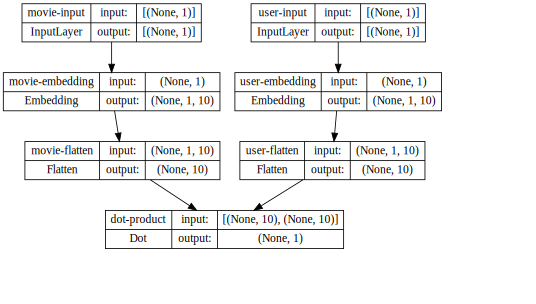

In [8]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot
from keras.utils import model_to_dot
from IPython.display import SVG

# Let's use a higher latent dimension.
latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

dot = model_to_dot(model, show_shapes=True, dpi=60)

SVG(dot.create(prog='dot', format='svg'))

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie-embedding (Embedding  (None, 1, 10)                97250     ['movie-input[0][0]']         
 )                                                                                                
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                6110      ['user-input[0][0]']      

Epoch 1/10
2521/2521 [==============================] - 10s 3ms/step - loss: 11.0572
Epoch 2/10
2521/2521 [==============================] - 6s 2ms/step - loss: 3.5869
Epoch 3/10
2521/2521 [==============================] - 6s 2ms/step - loss: 1.8957
Epoch 4/10
2521/2521 [==============================] - 6s 2ms/step - loss: 1.3377
Epoch 5/10
2521/2521 [==============================] - 6s 2ms/step - loss: 1.0786
Epoch 6/10
2521/2521 [==============================] - 6s 2ms/step - loss: 0.9377
Epoch 7/10
2521/2521 [==============================] - 6s 2ms/step - loss: 0.8519
Epoch 8/10
2521/2521 [==============================] - 6s 2ms/step - loss: 0.7955
Epoch 9/10
2521/2521 [==============================] - 6s 2ms/step - loss: 0.7543
Epoch 10/10
2521/2521 [==============================] - 6s 2ms/step - loss: 0.7235


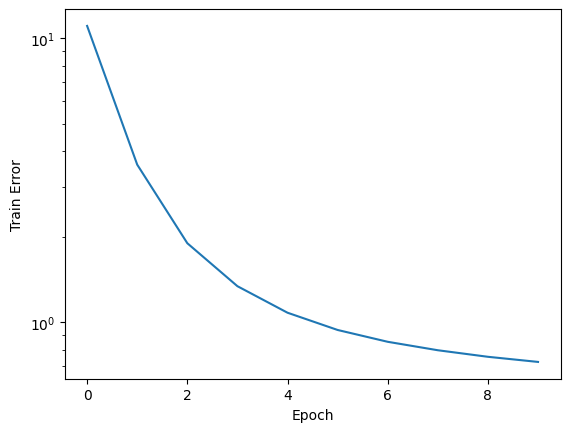

631/631 [==============================] - 1s 1ms/step


0.7801071000210638

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.user_id, train.movie_id], train.rating, epochs =10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

In [11]:
from keras.constraints import non_neg

latent_dim = 5

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding',
                                                        embeddings_constraint=non_neg())(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding',
                                                      embeddings_constraint=non_neg())(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

### Neural Network with MF

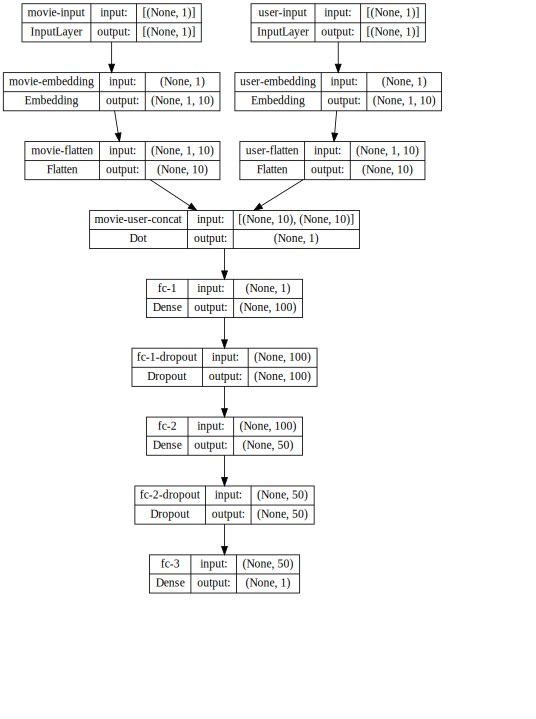

In [12]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot, Dropout, Dense
from keras.optimizers import Adam
from keras.utils import model_to_dot
from IPython.display import SVG

latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

concat = Dot(axes=1, name='movie-user-concat')([movie_vec, user_vec])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.2, name='fc-1-dropout')(fc_1)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)


model = Model([user_input, movie_input], fc_3)
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

dot = model_to_dot(model, show_shapes=True, dpi=60)

SVG(dot.create(prog='dot', format='svg'))


In [13]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie-embedding (Embedding  (None, 1, 10)                97250     ['movie-input[0][0]']         
 )                                                                                                
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                6110      ['user-input[0][0]']    

Epoch 1/10
2521/2521 [==============================] - 12s 4ms/step - loss: 1.3034
Epoch 2/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0936
Epoch 3/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.2470
Epoch 4/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0987
Epoch 5/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.1088
Epoch 6/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0944
Epoch 7/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0941
Epoch 8/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0943
Epoch 9/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0951
Epoch 10/10
2521/2521 [==============================] - 9s 3ms/step - loss: 1.0951


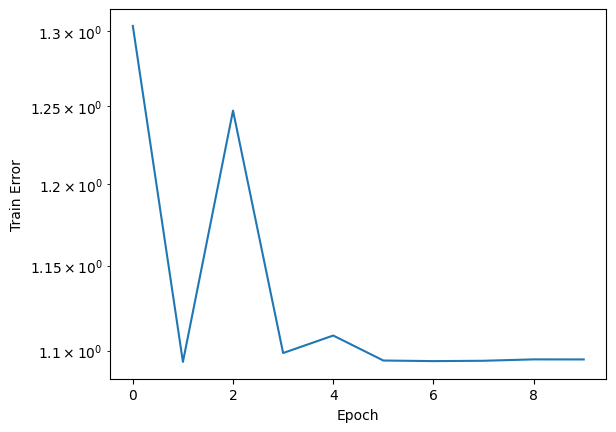

631/631 [==============================] - 1s 1ms/step


0.8589538110243522

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

## Multi-Layer Perceptron

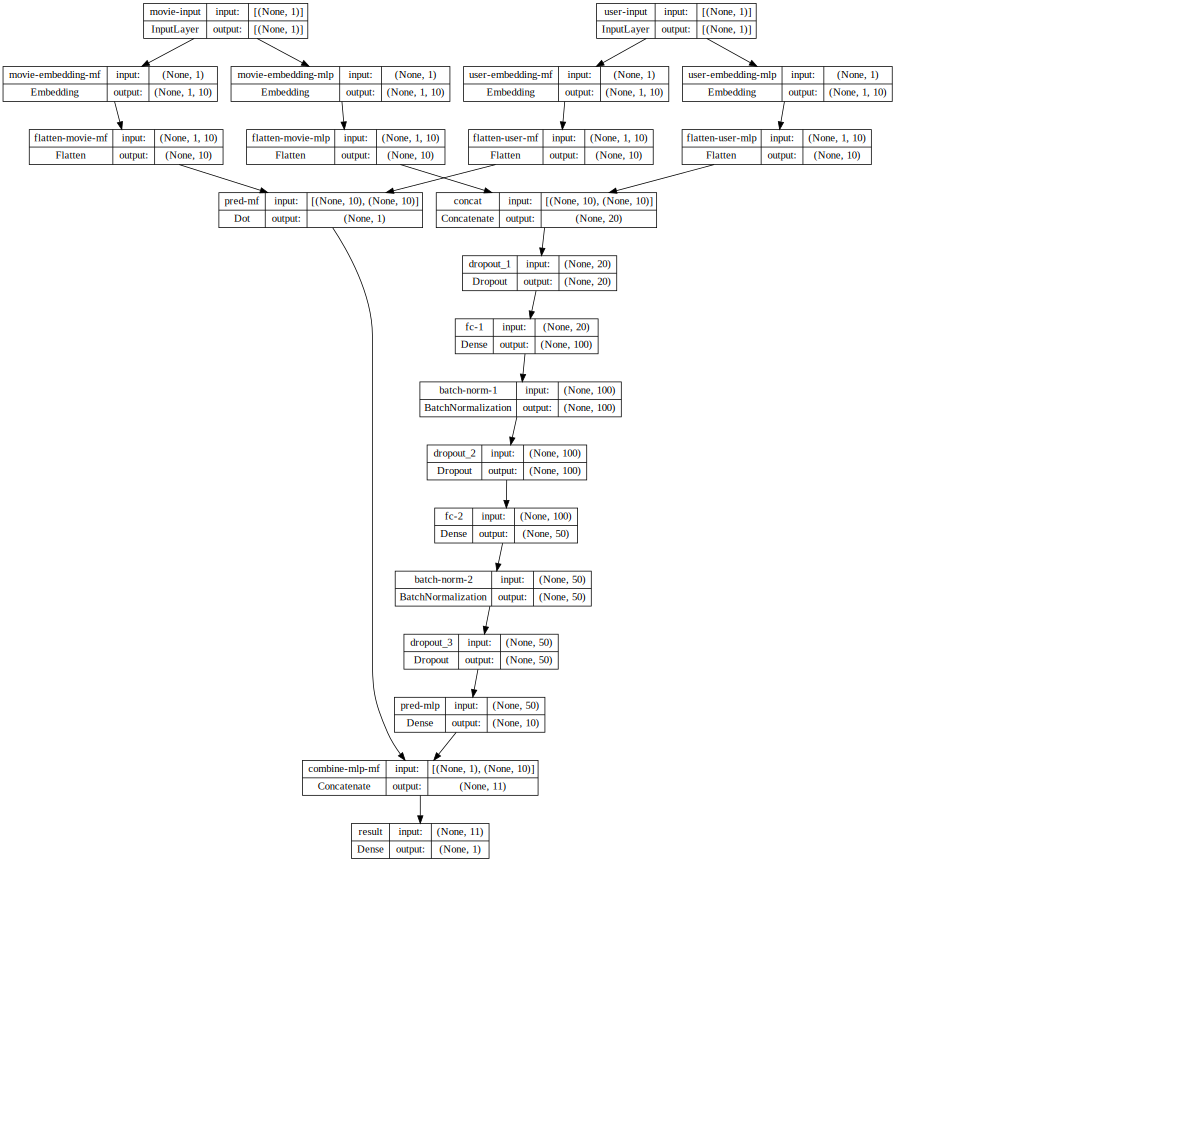

In [15]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Concatenate, Dot, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils import model_to_dot
from IPython.display import SVG

latent_dim = 10

# Define inputs
movie_input = Input(shape=[1],name='movie-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
movie_embedding_mlp = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mlp')(movie_input)
movie_vec_mlp = Flatten(name='flatten-movie-mlp')(movie_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
movie_embedding_mf = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mf')(movie_input)
movie_vec_mf = Flatten(name='flatten-movie-mf')(movie_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = Concatenate(name='concat')([movie_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = Dot(axes=1, name='pred-mf')([movie_vec_mf, user_vec_mf])
combine_mlp_mf = Concatenate(name='combine-mlp-mf')([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, movie_input], result)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

dot = model_to_dot(model, show_shapes=True, dpi=55)

SVG(dot.create(prog='dot', format='svg'))

In [16]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie-embedding-mlp (Embed  (None, 1, 10)                97250     ['movie-input[0][0]']         
 ding)                                                                                            
                                                                                                  
 user-embedding-mlp (Embedd  (None, 1, 10)                6110      ['user-input[0][0]']    

Epoch 1/10
2521/2521 [==============================] - 20s 7ms/step - loss: 0.7833
Epoch 2/10
2521/2521 [==============================] - 15s 6ms/step - loss: 0.6503
Epoch 3/10
2521/2521 [==============================] - 15s 6ms/step - loss: 0.5750
Epoch 4/10
2521/2521 [==============================] - 15s 6ms/step - loss: 0.5275
Epoch 5/10
2521/2521 [==============================] - 15s 6ms/step - loss: 0.4971
Epoch 6/10
2521/2521 [==============================] - 15s 6ms/step - loss: 0.4763
Epoch 7/10
2521/2521 [==============================] - 15s 6ms/step - loss: 0.4609
Epoch 8/10
2521/2521 [==============================] - 13s 5ms/step - loss: 0.4481
Epoch 9/10
2521/2521 [==============================] - 13s 5ms/step - loss: 0.4392
Epoch 10/10
2521/2521 [==============================] - 13s 5ms/step - loss: 0.4301


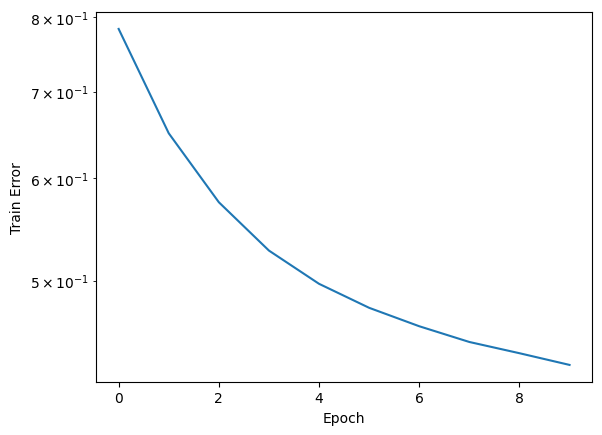

631/631 [==============================] - 1s 2ms/step


0.7344035106683013

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)